In [1]:
from data_loading import load_data
from preprocessing import ligand_umap, cluster_ligand, prot_umap
from model_training import train_knn, train_svm, train_logistic, train_mlp
import numpy as np
import pandas as pd
import torch

In [2]:
cd ..

/Users/riccardocarpineto/Documents/ADA/ada-2024-project-abrac-adabra


In [3]:
# Load data
filtered_best_ligand_ic50, unique_smiles_df, embeddings = load_data(idea='idea2')

# Reduce dimensionality and preprocess

/opt/anaconda3/envs/ada/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/anaconda3/envs/ada/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


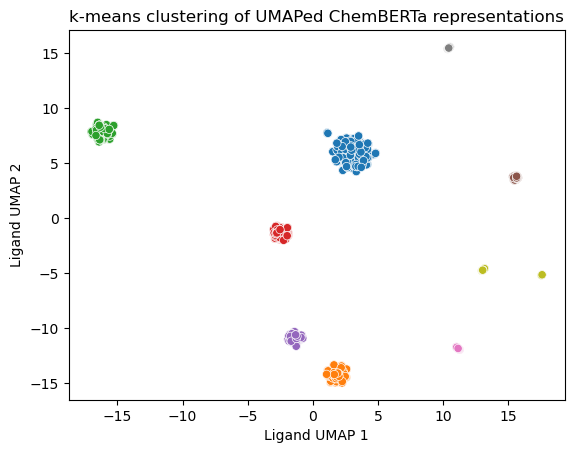

In [4]:
# Preprocess data
n_clusters = 9
merged_umap_df = ligand_umap(unique_smiles_df, embeddings, dimensions = 3,plotting = False)
merged_umap_df = cluster_ligand(merged_umap_df, n_clusters = n_clusters)

/opt/anaconda3/envs/ada/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


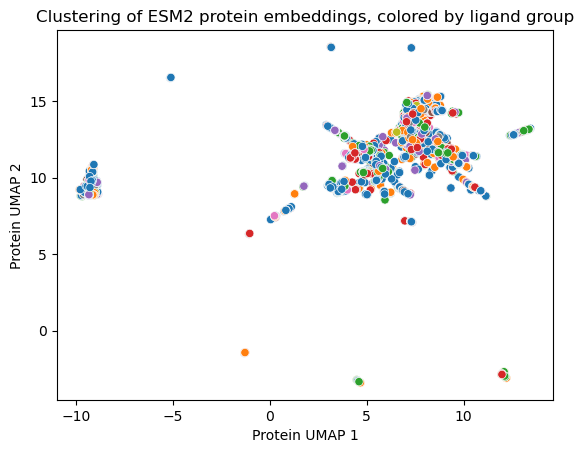

In [5]:
protein_ligand_matched = prot_umap(filtered_best_ligand_ic50, merged_umap_df, dimensions = 3, n_clusters = n_clusters)

# Train models

In [6]:
X_prot = np.array([np.squeeze(x) for x in protein_ligand_matched['ESM2 Embedding']])
y = protein_ligand_matched['Ligand class']

cv = 2
# Train models
knn_gscv = train_knn(X_prot, y,cv = cv);
svm_clf = train_svm(X_prot, y,cv = cv);
ll_gscv = train_logistic(X_prot, y,cv = cv);
#mlp_clf = train_mlp(X_prot, y,num_layers = 2, cv = cv);

k-NN: best balanced accuracy of 0.1178, for {'n_neighbors': 9}.
SVM: CV balanced accuracy of 0.1110.
